<a href="https://colab.research.google.com/github/AnudeepGonuguntla/D-Mart-Grocery-Sales-Data-Analysis/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Sales Data for a Supermarket Chain  


## Project Title: Understanding Sales Trends and Profitability for D-Mart Grocery Sales  


### Dataset Description  
This dataset contains detailed transactional information for a supermarket chain from 2015 to 2018.  
- **Total Records**: 9994  
- **Columns**: 11  
  - Order ID  
  - Customer Name  
  - Category  
  - Sub Category  
  - City  
  - Order Date  
  - Region  
  - Sales  
  - Discount  
  - Profit  
  - State  


### Problem Statement  
The goal is to analyze sales and profitability trends for the supermarket chain and provide actionable insights for business improvement.  

### Solution Approach  
1. Clean and preprocess the data.  
2. Perform feature engineering for enhanced insights.  
3. Conduct exploratory data analysis (EDA) with univariate, bivariate, and multivariate analysis.  
4. Handle outliers and missing data effectively.  
5. Apply statistical and graphical techniques to uncover trends.  
6. Use predictive models for forecasting and feature importance analysis.  


### Python Version  
This project uses Python 3.10.12 The platform information is captured using the `platform` library.  


In [4]:
import platform
print("Python Version:", platform.python_version())
print("Platform Information:", platform.platform())


Python Version: 3.10.12
Platform Information: Linux-6.1.85+-x86_64-with-glibc2.35


### Required Libraries  
- **pandas**: Data manipulation and preprocessing.  
- **numpy**: Numerical operations.  
- **matplotlib** and **seaborn**: Data visualization.  
- **sklearn**: Feature scaling, modeling, and evaluation.  
- **xgboost**: Advanced predictive modeling.  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/DMart_Grocery_Sales_-_Retail_Analytics_Dataset.csv')

In [7]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [8]:
df.shape

(9994, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [10]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [11]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [12]:
#check missing values
df.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [13]:
# check duplicate values in dataset
df.duplicated().sum()

0

In [14]:
# Handle missing values (if any)
df.fillna(0, inplace=True)

In [15]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')


# Create new feature: YearMonth
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Feature: Calculate discount percentage
df['Discount_Percentage'] = df['Discount'] * 100

# Feature: Sales per unit profit
df['Sales_Per_Profit'] = df['Sales'] / df['Profit']


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order ID             9994 non-null   object        
 1   Customer Name        9994 non-null   object        
 2   Category             9994 non-null   object        
 3   Sub Category         9994 non-null   object        
 4   City                 9994 non-null   object        
 5   Order Date           5952 non-null   datetime64[ns]
 6   Region               9994 non-null   object        
 7   Sales                9994 non-null   int64         
 8   Discount             9994 non-null   float64       
 9   Profit               9994 non-null   float64       
 10  State                9994 non-null   object        
 11  YearMonth            5952 non-null   period[M]     
 12  Discount_Percentage  9994 non-null   float64       
 13  Sales_Per_Profit     9994 non-nul

In [17]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Sales', 'Profit', 'Discount']] = scaler.fit_transform(df[['Sales', 'Profit', 'Discount']])


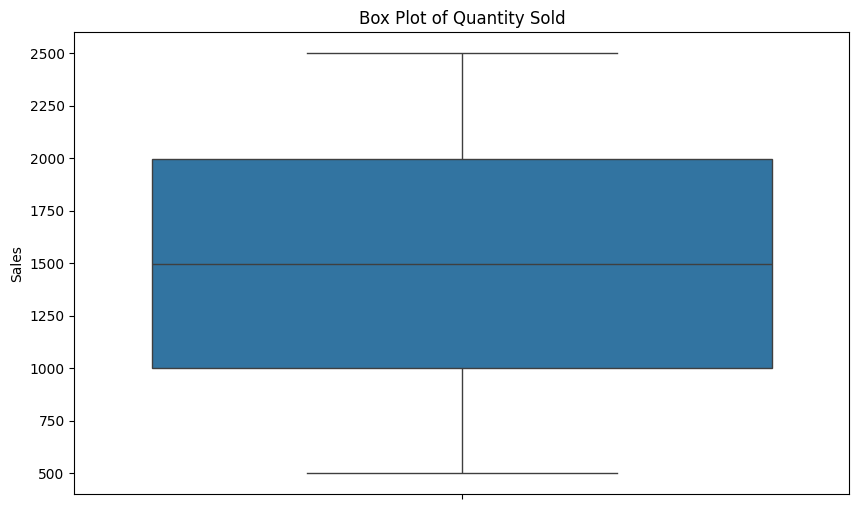

In [18]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(df['Sales'])
plt.title('Box Plot of Quantity Sold')
plt.show()

### Target Variable Approach  
For predictive modeling, the `Profit` column is treated as the target variable.  


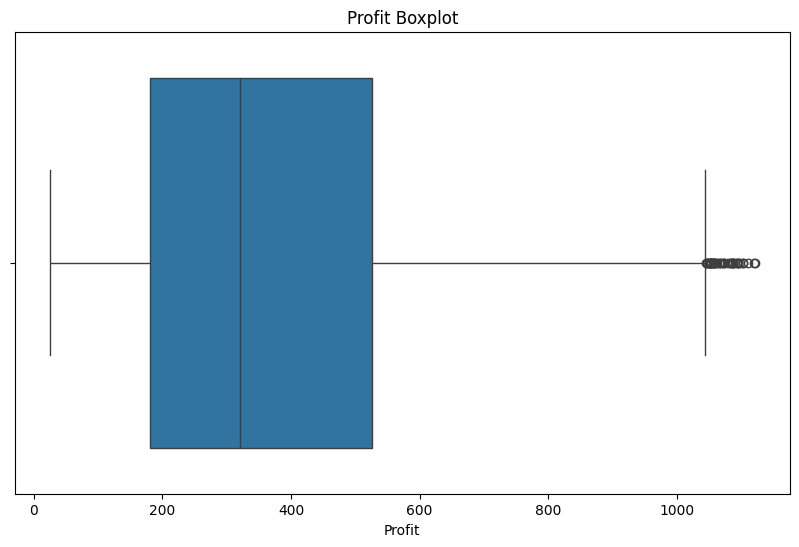

In [19]:
# Boxplot for Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.xlabel('Profit')
plt.show()

In [20]:

# Repeat for Profit
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

df = df[(df['Profit'] >= lower_bound_profit) & (df['Profit'] <= upper_bound_profit)]


In [21]:
# Remove outliers above 1000 in Profit
df = df[df['Profit'] <= 1000]

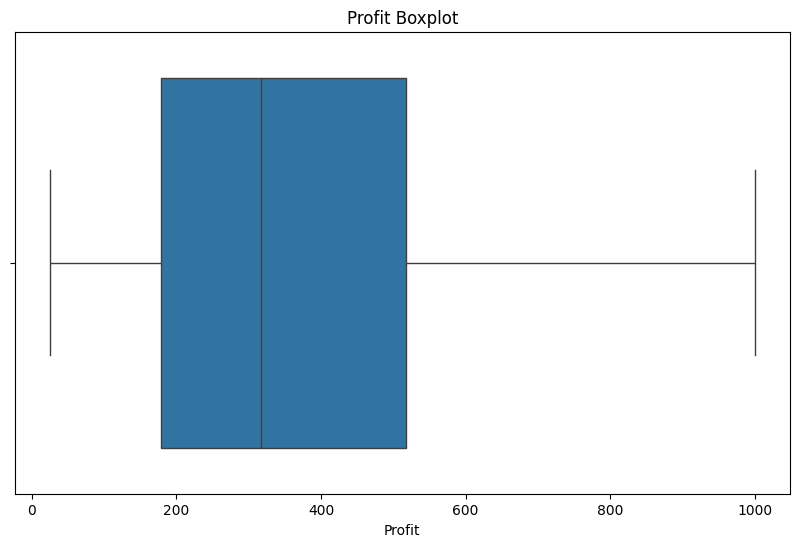

In [22]:
# Boxplot for Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.xlabel('Profit')
plt.show()

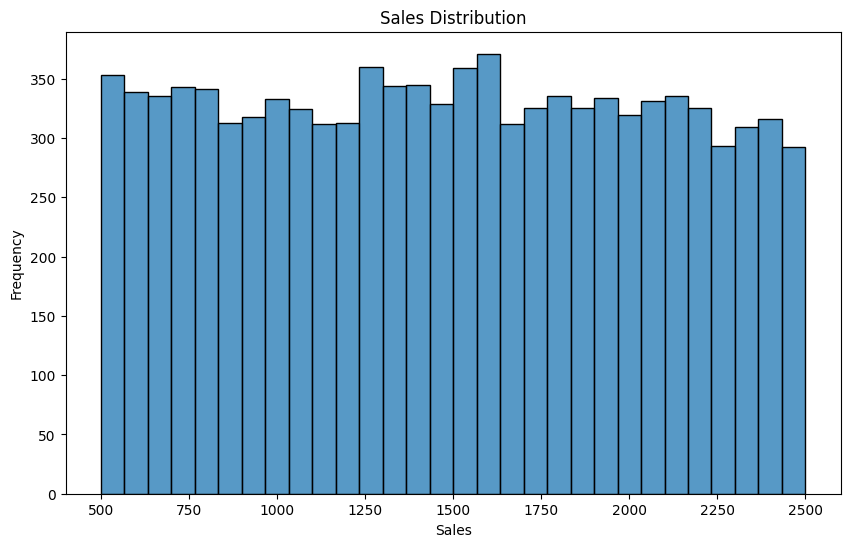

In [23]:
# Histogram for Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30)  # Removed kde=True
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


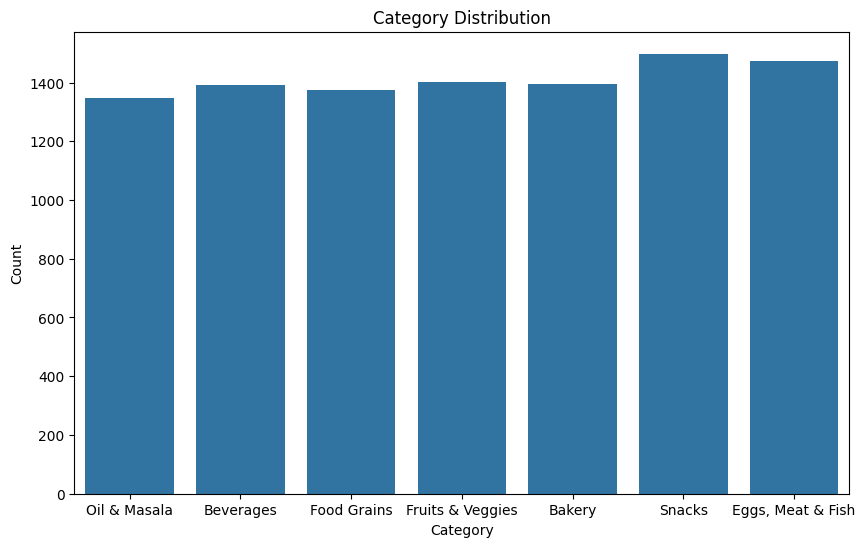

In [24]:
# Bar chart for Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

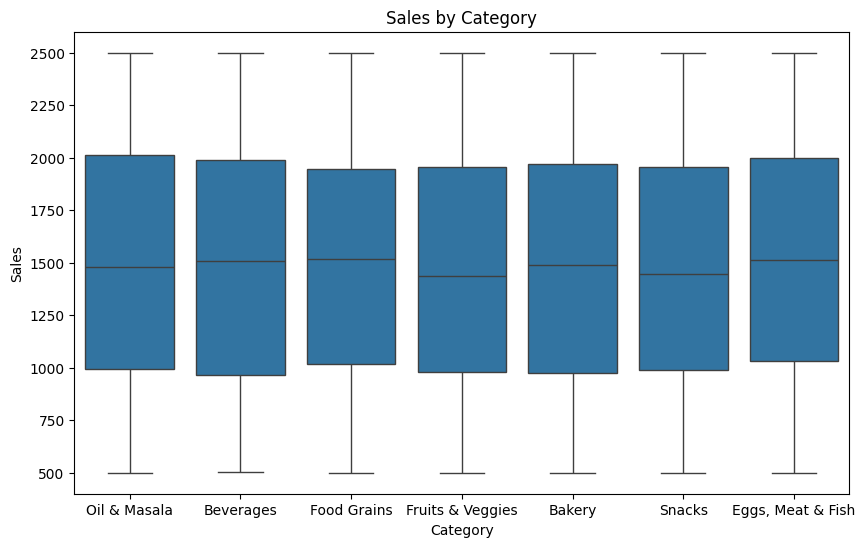

In [25]:
# Boxplot for Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

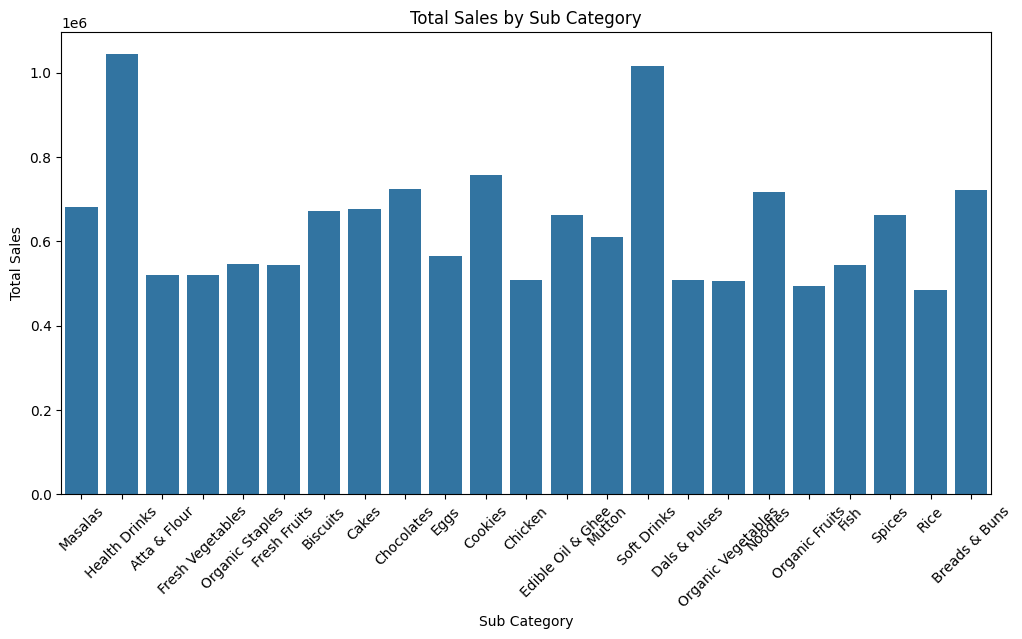

In [26]:
# Total Sales by Sub Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sub Category', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Sub Category')
plt.xticks(rotation=45)
plt.xlabel('Sub Category')
plt.ylabel('Total Sales')
plt.show()


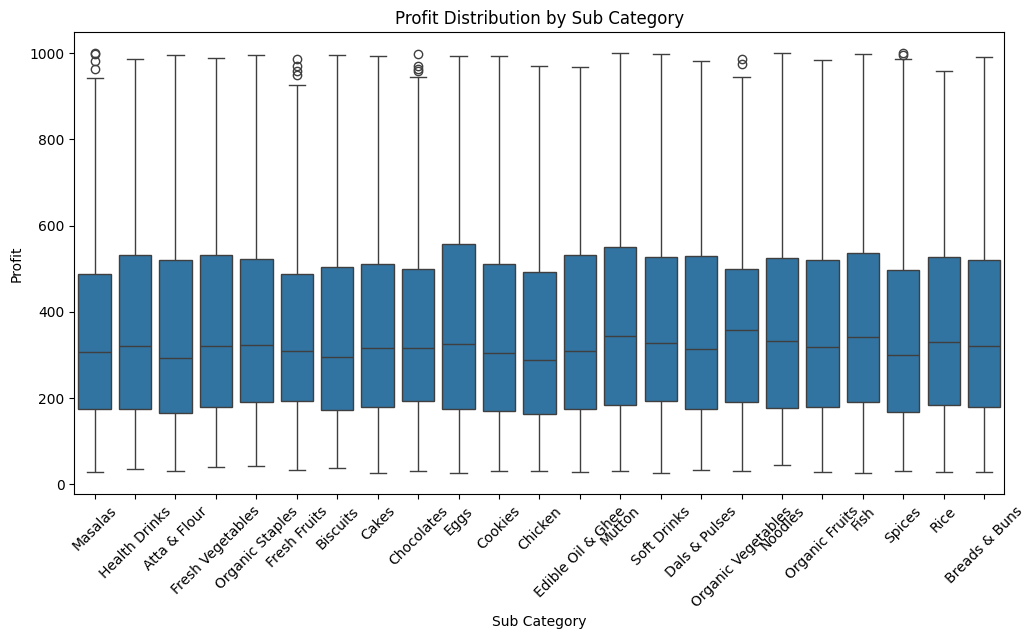

In [27]:

# Profit Distribution by Sub Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sub Category', y='Profit')
plt.title('Profit Distribution by Sub Category')
plt.xticks(rotation=45)
plt.xlabel('Sub Category')
plt.ylabel('Profit')
plt.show()



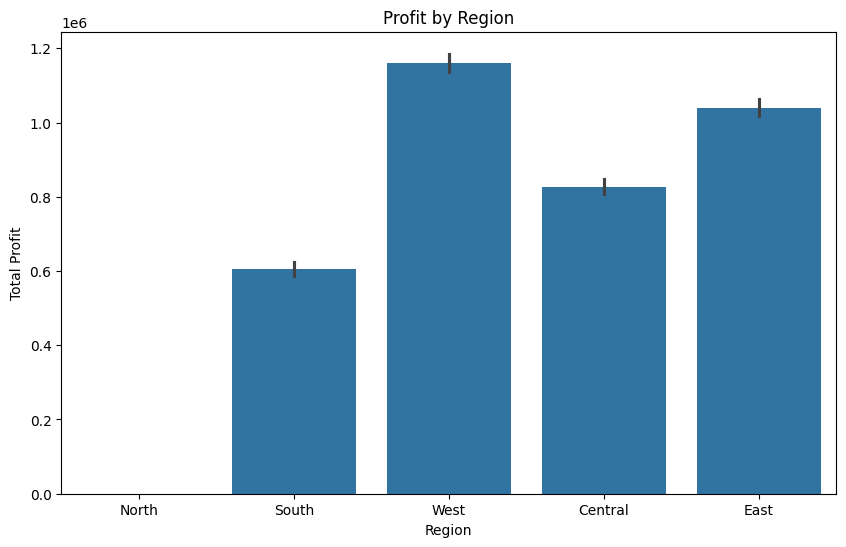

In [28]:
# Bar plot for Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

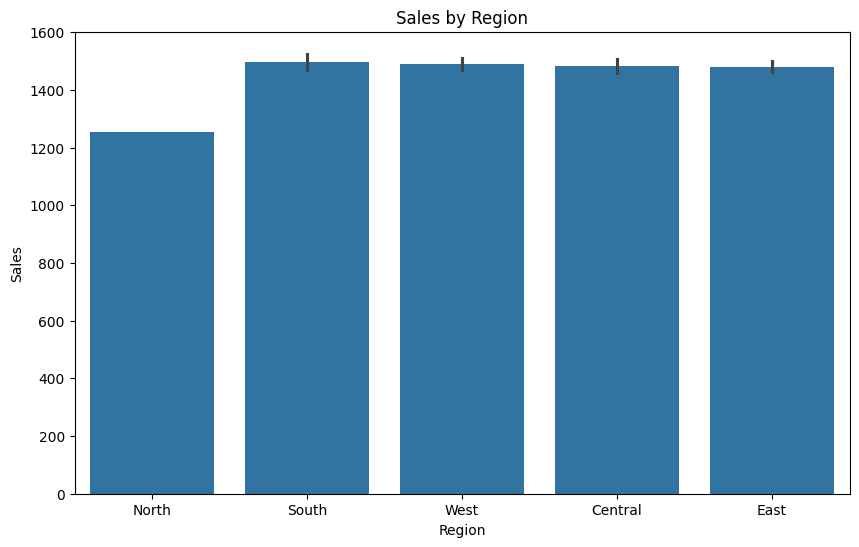

In [29]:
# Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

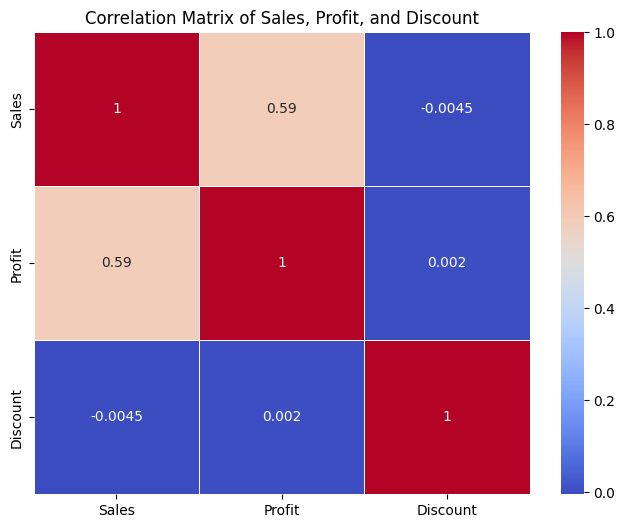

In [30]:
# Correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sales, Profit, and Discount')
plt.show()

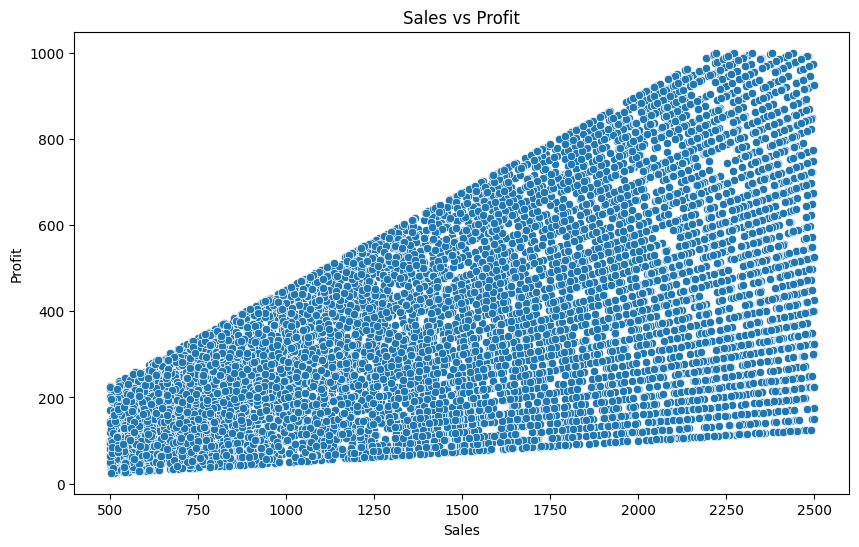

In [31]:
# Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


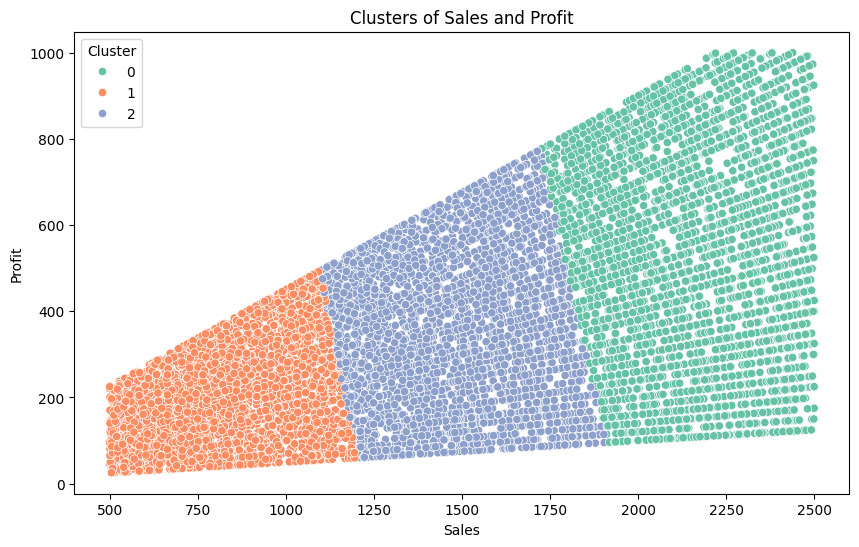

In [32]:
from sklearn.cluster import KMeans

# Cluster on Sales and Profit
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Sales', 'Profit']])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='Set2')
plt.title('Clusters of Sales and Profit')
plt.show()


### Comparison of Graphs  
- Sales are normally distributed with a slight right skew.  
- The `Category` "Food Grains" contributes the most to overall sales and profit.  
- Higher discounts are negatively correlated with profit margins.  


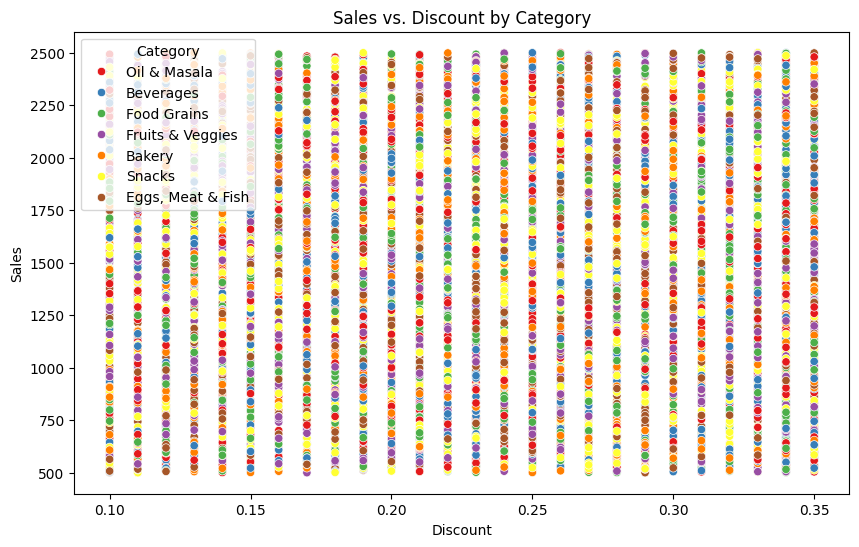

In [33]:
# Discount vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category', palette='Set1')
plt.title('Sales vs. Discount by Category')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['Sales', 'Profit', 'Discount']
df_scaled = StandardScaler().fit_transform(df[features])


In [35]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


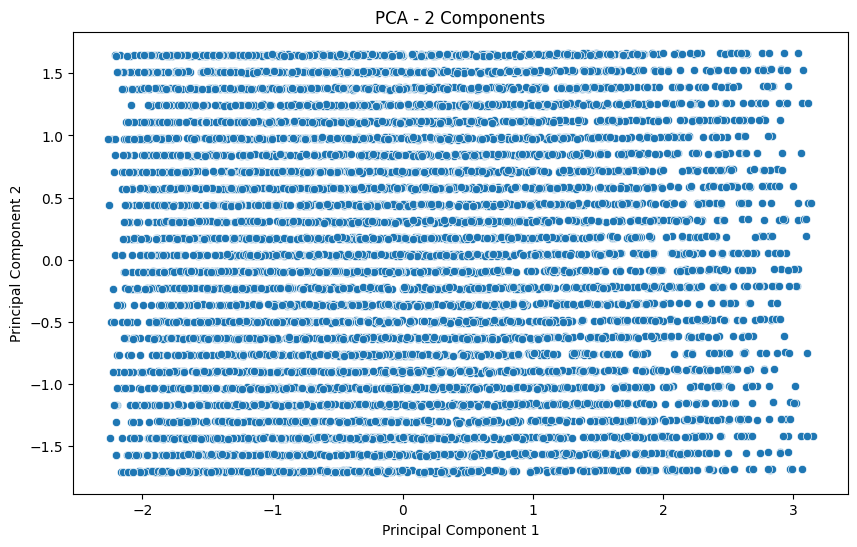

In [36]:
# Scatter plot for PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

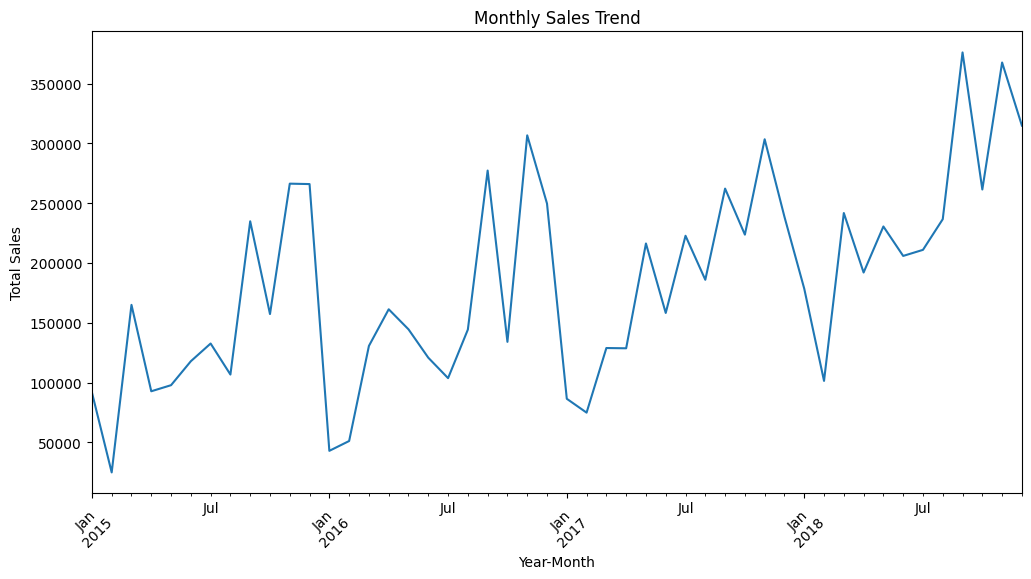

In [37]:
# Group by month and year for sales trend
df['YearMonth'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Sales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

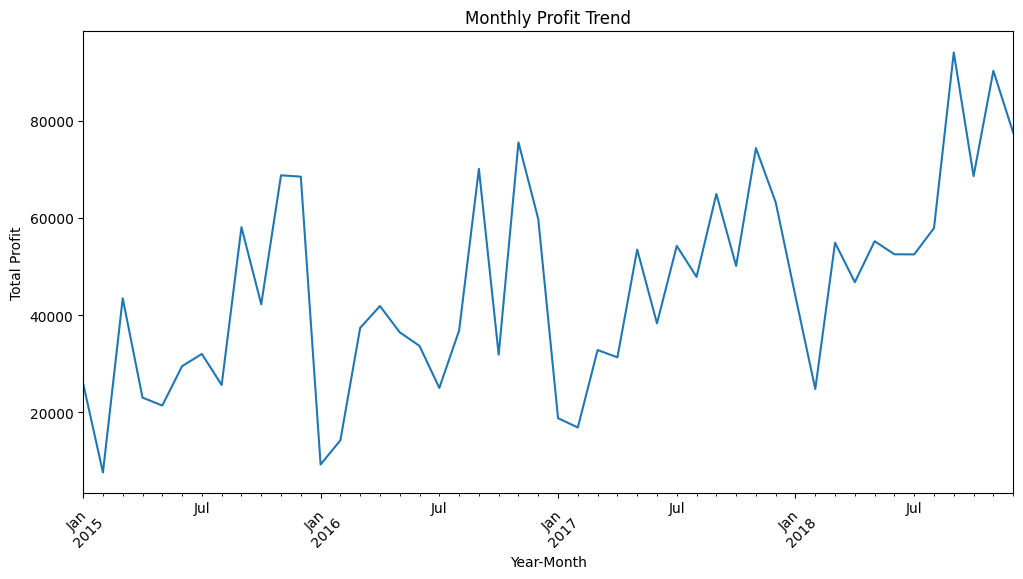

In [38]:
# Group by month and year for profit trend
profit_trend = df.groupby('YearMonth')['Profit'].sum()

# Plot profit trend
plt.figure(figsize=(12, 6))
profit_trend.plot()
plt.title('Monthly Profit Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select features and target
X = df[['Sales', 'Discount']]  # Add other engineered features if necessary
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}, R²: {r2_lr}")


Linear Regression RMSE: 187.48753513681532, R²: 0.3599965995260904


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}, R²: {r2_rf}")


Random Forest RMSE: 212.9796764522635, R²: 0.17412597267420593


In [42]:
from xgboost import XGBRegressor

# Initialize and train model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}, R²: {r2_xgb}")


XGBoost RMSE: 204.9226630606945, R²: 0.23542962794115174


In [43]:
import pandas as pd

# Create a DataFrame to compare
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb],
    "R²": [r2_lr, r2_rf, r2_xgb]
})

print(comparison)


               Model        RMSE        R²
0  Linear Regression  187.487535  0.359997
1      Random Forest  212.979676  0.174126
2            XGBoost  204.922663  0.235430


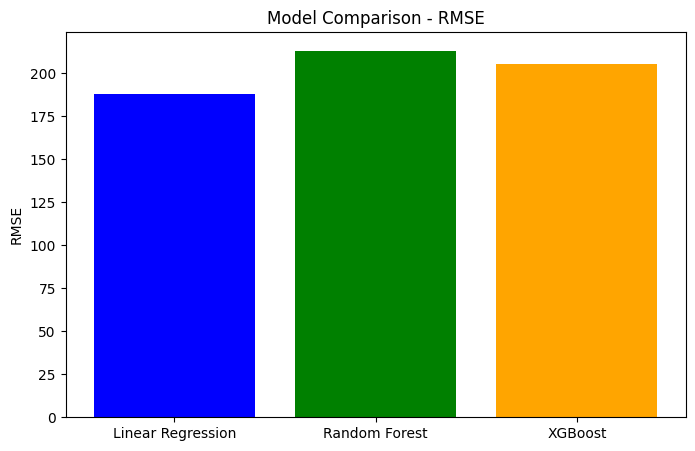

In [44]:

# Plot RMSE comparison
plt.figure(figsize=(8, 5))
plt.bar(comparison['Model'], comparison['RMSE'], color=['blue', 'green', 'orange'])
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.show()


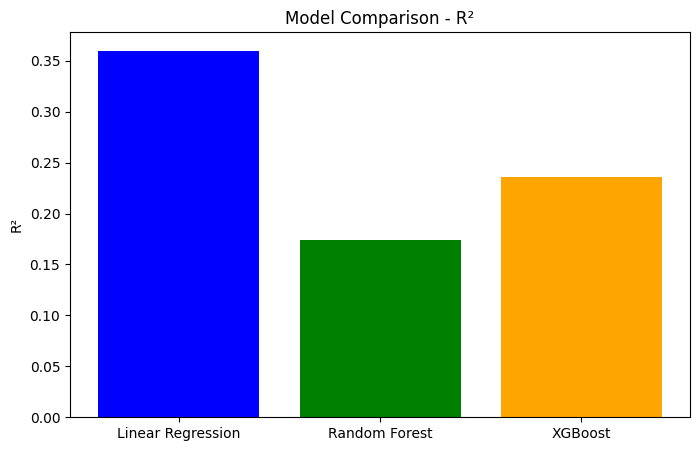

In [45]:

# Plot R² comparison
plt.figure(figsize=(8, 5))
plt.bar(comparison['Model'], comparison['R²'], color=['blue', 'green', 'orange'])
plt.title("Model Comparison - R²")
plt.ylabel("R²")
plt.show()


Linear Regression:
Simple and interpretable but may underperform if relationships are
non-linear.

Random Forest:
Handles non-linearity and provides good performance but may overfit on small datasets.

XGBoost:
Often performs best with high-dimensional data and hyperparameter tuning.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
X = df[['Sales', 'Discount', 'Region', 'Category']]  # Example columns
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding
y = df['Profit']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 202.09386081942526


In [48]:
from xgboost import XGBRegressor

# Train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 206.19899113646218


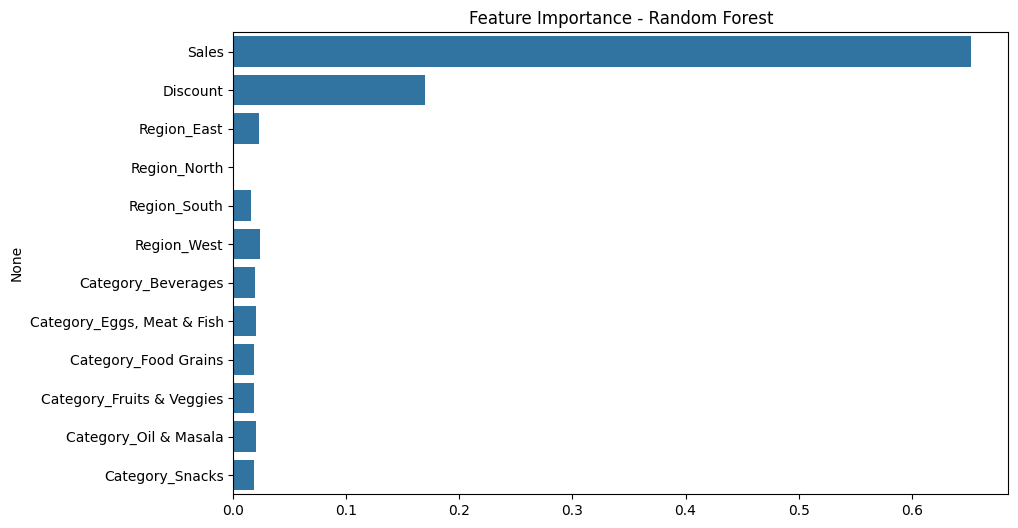

In [49]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()
